Question 1

In [9]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load penguins dataset
penguins = sns.load_dataset('penguins')

# Function to add lines and rectangles to the figure
def add_statistics(fig, species, df):
    # Filter data for the species
    species_data = df[df['species'] == species]['flipper_length_mm'].dropna()

    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    flipper_min = species_data.min()
    flipper_max = species_data.max()
    std = species_data.std()
    iqr = np.percentile(species_data, 75) - np.percentile(species_data, 25)
    q1 = np.percentile(species_data, 25)
    q3 = np.percentile(species_data, 75)
    
    # Add horizontal lines for mean and median
    fig.add_vline(x=mean, line=dict(color='green', dash='dash'), annotation_text='Mean', row=1, col=1)
    fig.add_vline(x=median, line=dict(color='blue', dash='dash'), annotation_text='Median', row=1, col=1)
    
    # Add rectangles for the different ranges
    # Full range
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor="LightSkyBlue", opacity=0.2, 
                  annotation_text="Range", line_width=0)
    
    # Interquartile range (IQR)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="LightGreen", opacity=0.3, annotation_text="IQR", line_width=0)
    
    # 2 standard deviation range
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, fillcolor="Salmon", opacity=0.2, 
                  annotation_text="2 Std Dev", line_width=0)

# Create a figure with histograms for each species
fig = px.histogram(penguins, x='flipper_length_mm', color='species', marginal='box')

# For each species, add statistical markers
species_list = penguins['species'].unique()
for species in species_list:
    add_statistics(fig, species, penguins)

# Show the figure
fig.show()


 - px.histogram() is used to plot the histograms for each species, with the data being grouped by species.
 - The mean and median are marked using fig.add_vline() with different colors.
 - The full range of flipper length is shown with a light blue rectangle.
 - The interquartile range is shown with the light green rectangle.
 - The range within the two standard deviations from the mean is shown using the light red rectangle.
 
 Sidenote: While talking with ChatGPT, I was trying to fix the labels at the top of the graph (mean, median, range, etc). I figured out I can increase the top margin using (margin=dict(t=100). While the code is suppose to do create more space for the labels, it appears to have no effect. After a considerable amount of time trying to understand how to seperate these labels, I was unable to do so.

Question 2

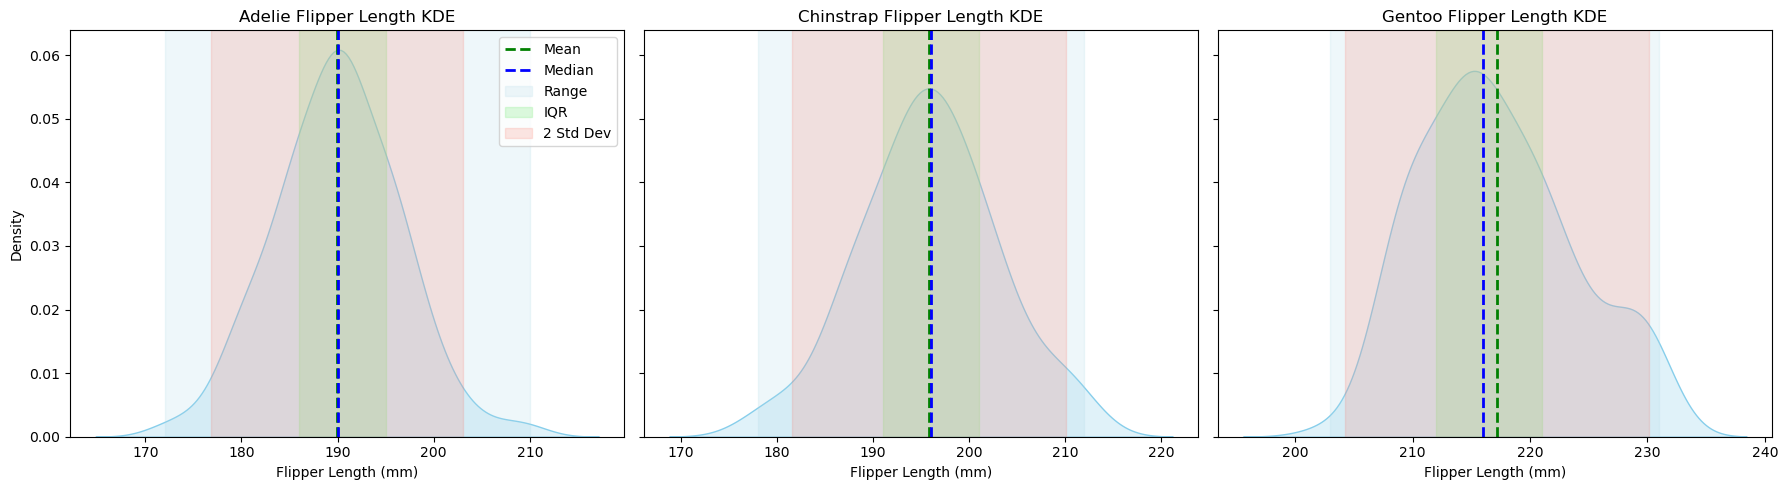

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load penguins dataset
penguins = sns.load_dataset('penguins')

# List of species
species_list = penguins['species'].unique()

# Set up figure and axes for 3 KDE plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Function to add lines and rectangles to the KDE plot
def add_statistics(ax, species, df):
    # Filter data for the species
    species_data = df[df['species'] == species]['flipper_length_mm'].dropna()

    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    flipper_min = species_data.min()
    flipper_max = species_data.max()
    std = species_data.std()
    q1 = np.percentile(species_data, 25)
    q3 = np.percentile(species_data, 75)
    
    # Plot KDE
    sns.kdeplot(species_data, ax=ax, fill=True, color='skyblue')
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='green', linestyle='--', label='Mean', linewidth=2)
    ax.axvline(median, color='blue', linestyle='--', label='Median', linewidth=2)
    
    # Add shaded areas for the ranges
    # Full range
    ax.axvspan(flipper_min, flipper_max, color='lightblue', alpha=0.2, label='Range')
    
    # Interquartile range (IQR)
    ax.axvspan(q1, q3, color='lightgreen', alpha=0.3, label='IQR')
    
    # 2 standard deviation range
    ax.axvspan(mean - 2*std, mean + 2*std, color='salmon', alpha=0.2, label='2 Std Dev')

    # Set title and labels
    ax.set_title(f"{species} Flipper Length KDE")
    ax.set_xlabel("Flipper Length (mm)")
    ax.set_ylabel("Density")

# Loop through species and plot on each axis
for ax, species in zip(axes, species_list):
    add_statistics(ax, species, penguins)

# Add legends to the first plot (to avoid repeating it in every plot)
axes[0].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



Kernel Density Estimation (KDE): 
- Using sns.kdeplot() plots the distribution of flipper_length_mm for each species, filling the area under the curve with fill=True.

Marking the Statstics:
- ax.axvline() is used to draw vertical lines representing the mean (in green) and the median (in blue).
- ax.axvspan() is used to add shaded regions representing:
- The full range (min to max), is shown in light blue.
- The interquartile range (IQR, between Q1 and Q3, in light green).
- The range covering two standard deviations away from the mean (in light red).

Layout:
- 3 KDE plots is created using plt.subplots(1, 3) and the y-axis (sharey=True) is shared so that the density scales are consistent for each species.
- Titles and labels are added to each plot.

Legends:
- To avoid clutter, the legend is added only to the first plot (axes[0].legend())

Tight Layout:
- plt.tight_layout() is used to ensure that the plots are properly spaced and do not overlap.

Question 3

1.Boxplot:
Key Features: Central Tendency, Spread, Outliners
Advantages: Good for comparing distributions across groups, highlighting outliers, and showing the spread of data.
Limitations: Lacks information about the detailed shape of the distribution, such as looking for both single and multiple peaks.

2.Histograms:
Key Features: Frequency and Shape of Distribution
Advantages: Clearly shows how data is shown across different values, making it easy to see  skewness and overall spread.
Limitations: too many or too few bins can obscure important details, affecting the visualization of the data 

3.Kernel Density Estimators:
Key Features: Smoothing and Continuous Shape
Advantages: good for understanding the overall shape of the distribution (peaks, valleys, skewness), including subtle patterns like multimodality (multiple peaks).
Limitations: Sensitive to bandwidth parameter which can lead to oversmoothing or undersmoothing. It is also more abstract than histograms and can sometimes miss outliers or specific values.

Box Plots are ideal for comparing groups and identifying outliers in a concise manner but are limited in showing the overall distribution's shape.

Histograms are best for visualizing the raw frequency distribution and understanding the shape of the data, but are sensitive to bin sizes.

Kernel Density Estimators are excellent for a smooth, continuous view of the distribution’s shape and highlighting subtle patterns, but sensitive to the bandwidth that is picked.

Each method has its strengths, and the choice depends on whether you want a detailed look at the data’s shape, a summary of statistics, or a clear view of frequencies.

Question 4

Looking at the data provided,
1. Datasets with similar means and similar variances: No datasets perfectly match both criteria, but data2 and data4 come the closest.
2. Datasets with similar means but quite different variances: data1 and data2.
3. Datasets with similar variances but quite different means: data2 and data3.
4. Datasets with quite different means and quite different variances: data1 and data4.


Question 5

Right-skewed (Positively Skewed):
- The mean is greater than the median because the distribution has a longer tail on the right-hand side (towards larger values). The extreme high values pull the mean to the right.
Examples include income distributions where a small number of very large values (outliers) shift the mean to be higher than the median.
Left-skewed (Negatively Skewed):
- The mean is less than the median because the distribution has a longer tail on the left-hand side (towards smaller values). The extreme low values pull the mean to the left.
Examples include distributions of test scores where most people score high but a few score very low, pulling the mean downward.

Why Does This Happen? :The median is the central value in a sorted dataset, so it’s less affected by extreme values. It divides the dataset into two equal halves, meaning 50% of the data points are on either side of the median. The mean, however, is sensitive to extreme values. It’s the average of all values in the dataset, so outliers (extremely high or low values) have a larger impact on the mean than on the median.

- stats.gamma(a=2, scale=2).rvs(size=1000) generates 1,000 random values from a Gamma distribution, which is known for being right-skewed. 
- The a=2 parameter sets the shape of the distribution, and scale=2 controls its spread.
- px.histogram from the plotly.express library is used to visualize the distribution.
- The fig1.show(renderer="png") command displays the histogram, allowing us to visually inspect the right-skewed nature of the distribution.  

When extending the code,
- sample_right uses the Gamma distribution as before, creating right-skewed data. The mean should be greater than the median.
-  sample_left is generated from a lognormal distribution and negated to create a left-skewed distribution. Here, the mean will be less than the median.

Caculate mean and median using np.mean() and np.median() and plot vertical lines on the histograms.
- For the right-skewed distribution, the mean is greater than the median.
- For the left-skewed distribution, the mean is less than the median.

Question 6

In the last tutorial session, I came up with 4 steps to work ing with a dataset. 

 Step 1. Understand what type of data your working with.
The data set I picked is a Iris dataset, a well-known dataset in machine learning and statistics. This dataset contains information about three different species of iris flowers: Iris-setosa, Iris-versicolor, and Iris-virginica. 

Step 2. Clean up the data take out missing values you don’t need, (simplify data)
For each species, we will only be looking at the measurements of four features:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

Step 3. Isolate the relevant data

In [2]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the iris dataset from seaborn
iris = sns.load_dataset('iris')

# Show the first few rows of the dataset
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


4. Statical analysis
- Petal Length and Petal Width have the strongest correlation. This suggests that these two features are highly related, and we could likely use one to predict the other.
- Sepal Width has a weak correlation with other features, indicating it may be less useful for classification.
- Iris-setosa is clearly distinguishable from the other species based on petal size, as seen in the boxplot. Its petals are much smaller compared to the other two species.
- Iris-versicolor and Iris-virginica have some overlap in certain features, but they can be separated when considering multiple features together, as shown in the pairplot.

Question 7

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns

# Load the iris dataset
iris = sns.load_dataset('iris')

# Create an animated scatter plot
fig = px.scatter(
    iris,
    x="sepal_length",
    y="sepal_width",
    color="species",
    animation_frame="petal_length",  # Using petal_length as the animation frame
    range_x=[4, 8],
    range_y=[1.5, 4.5],
    title="Iris Dataset Animation: Sepal Dimensions vs. Petal Length",
    labels={"sepal_length": "Sepal Length", "sepal_width": "Sepal Width"},
)

# Show the plot
fig.show()


Question 8

In [8]:
import plotly.express as px
import pandas as pd
import numpy as np

# Create a mock dataset for demonstration purposes
np.random.seed(42)

# Generate sample data
years = list(range(2000, 2021))  # Years from 2000 to 2020
names = ['A', 'B', 'C', 'D']  # Example names

data = pd.DataFrame({
    'year': np.tile(years, len(names)),
    'name': np.repeat(names, len(years)),
    'percent_change': np.random.uniform(-0.005, 0.005, len(years) * len(names)),
    'rank': np.random.randint(1, 100, len(years) * len(names)),
    'percent': np.random.uniform(0, 100, len(years) * len(names)),
    'sex': np.random.choice(['Male', 'Female'], len(years) * len(names))
})

# Create the animated scatter plot
fig = px.scatter(
    data,
    x="percent_change",           # X-axis: percent change
    y="rank",                     # Y-axis: rank
    size="percent",               # Size of bubbles: percent
    color="sex",                  # Color by sex
    animation_frame="year",       # Animate by year
    animation_group="name",       # Group by name
    hover_name="name",            # Hover info: name
    size_max=50,                  # Max size of bubbles
    range_x=[-0.005, 0.005],      # Set x-axis range
)

# Display the plot
fig.show()


Question 9

Yes

Chatbot Summary:https://chatgpt.com/share/66f5ff60-0134-800b-8af9-e5f6f9cbef8b